In [1]:
### for downloading data, see https://github.com/aninalu/SMK_api/blob/main/SMK_API_Tutorial_github.ipynb

In [ ]:
### importing libraries
import requests as requests
import json
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
### loading the data from your directory (see the link above for details on how to collect the data)
with open('metadata.txt') as json_file:
    new_data = json.load(json_file)

In [4]:
### creating a function that returns a dataframe with basic information about one art piece
def artist_row(new_data): ### has to be one art entry in a list (e.g. data[1])
    #storing the relevant information in lists
    id_number = new_data['id']
    #storing object number as list
    obj_number = new_data['object_number']
    try:
        titles = new_data['titles'][0]['title']
    except KeyError:
        titles = 'NA'
    try: 
        acq = new_data['acquisition_date_precision']
    except KeyError:
        acq = 'NA'    
   # else:
   #     acq = new_data['acquisition_date_precision']
    try:    
        display = new_data['on_display']
    except KeyError:
        dispay = 'NA'
    try:
        image = new_data['has_image']
    except KeyError:
        image = 'NA'
    try:
        techniques = new_data['techniques']
    except KeyError:
        techniques = 'NA'
    try:
        object_names = new_data['object_names'][0]['name']
        n_object_names = len(new_data['object_names'])
    except KeyError:
        object_names = 'NA'
        n_object_names = 0
    
    n_artists  = 0
    creator_name = 'NA'
    creator_gender = 'NA'
    creator_nationality = 'NA'
    try: 
        creator_name = new_data['production'][0]['creator']    
        creator_gender = new_data['production'][0]['creator_gender'] 
        creator_nationality = new_data['production'][0]['creator_nationality'] 
        n_artists  = len(new_data['production'])

    except KeyError:
        empty = "" 
    #creator_date_of_birth = new_data['production'][0]['creator_date_of_birth']
    #creator_date_of_death = new_data['production'][0]['creator_date_of_death']
    #merging the lists
    info = [id_number, obj_number, titles, acq, display, image, techniques, object_names,
        creator_name, creator_gender, creator_nationality, n_artists, n_object_names]
    ### converting into a dataframe
    df = pd.DataFrame([info], columns=['id_number','obj_number', 'titles', 'acq', 'display',
                                  'image', 'techniques', 'object_names', 'creator_name',
                                   'creator_gender', 'creator_nationality','n_artists',
                                       'n_object_names'])
    return(df)
        





In [5]:
### creating a function that returns basic information about multiple art pieces
def artists_rows(new_data):
    all_df = pd.DataFrame(columns=['id_number','obj_number', 'titles', 'acq', 'display',
                                  'image', 'techniques', 'object_names', 'creator_name',
                                   'creator_gender', 'creator_nationality','n_artists',
                                       'n_object_names'])
    length = len(new_data)
    for i in range(length):
        df = artist_row(new_data[i])
        frames = [df, all_df]
        all_df = pd.concat(frames)
    return(all_df)

In [ ]:
### returning a dataframe with basic information about all of the art pieces
df = artists_rows(new_data)

In [8]:
### exporting as a csv file
#df.to_csv(r'meta_data.csv', index = False)
df = pd.read_csv("meta_data.csv") 

In [12]:
### selecting art pieces with only one artist
df_single = df[df["n_artists"] == 1]
print("There are in total", len(df_single), "art pieces with a single artist/creator.")

There are in total 68470 art pieces with a single artist/creator.


In [11]:
### frequency table showing the genders of the artists in the dataframe
df.creator_gender.value_counts()

MALE       76198
FEMALE      5285
UNKNOWN     5108
Name: creator_gender, dtype: int64

In [ ]:
### formatting date of acquisition
df_single['date']= pd.to_datetime(df_single['acq'], format='%Y%m%d', errors='ignore')

In [14]:
### removing art pieces with unknown acquisition dates and pieces acquired before SMK was officially founded
df_single_1 = df_single[df_single["date"] != 'NA']
df_single_1 = df_single[df_single["date"] >= '1621-12-31']

In [33]:
### store (sorted) dates in separate objects 
acquisitions = df_single_1['Acquisition Date'].value_counts()
acquisitions_sorted = acquisitions.sort_index()

In [ ]:
### computing cumulative sum of art pieces by male artists (sorted by date)
df_single_male = df_single[df_single["creator_gender"] == 'MALE']
df_single_male['Acquisition Date'] = pd.to_datetime(df_single_male['acq'], errors='coerce')
acquisitions_male = df_single_male['Acquisition Date'].value_counts()
acquisitions_sorted_male = acquisitions_male.sort_index()
acquisitions_sorted_cumsum_male = acquisitions_sorted_male.cumsum()

In [ ]:
### computing cumulative sum of art pieces by female artists (sorted by date)
df_single_female = df_single[df_single["creator_gender"] == 'FEMALE']
df_single_female['Acquisition Date'] = pd.to_datetime(df_single_female['acq'], errors='coerce')
acquisitions_female = df_single_female['Acquisition Date'].value_counts()
acquisitions_sorted_female = acquisitions_female.sort_index()
acquisitions_sorted_cumsum_female = acquisitions_sorted_female.cumsum()

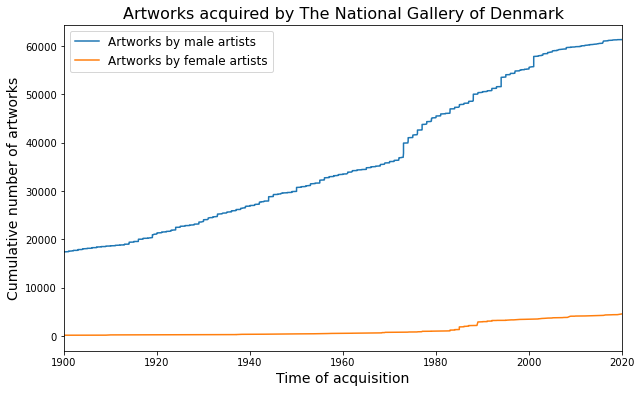

In [40]:
### graph showing art pieces acquired by SMK, sorted by date and gender (cumulative)
fig = plt.figure()
rcParams['figure.figsize'] = 10, 6
plt.plot(acquisitions_sorted_cumsum_male, label='Artworks by male artists')
plt.plot(acquisitions_sorted_cumsum_female, label='Artworks by female artists')
plt.xlim('1900', '2020')
plt.legend(fontsize=12)
plt.xlabel('Time of acquisition', fontsize=14)
plt.ylabel('Cumulative number of artworks', fontsize=14)
plt.title('Artworks acquired by The National Gallery of Denmark', fontsize=16)

plt.savefig('gender_plot_zoom', bbox_inches='tight')

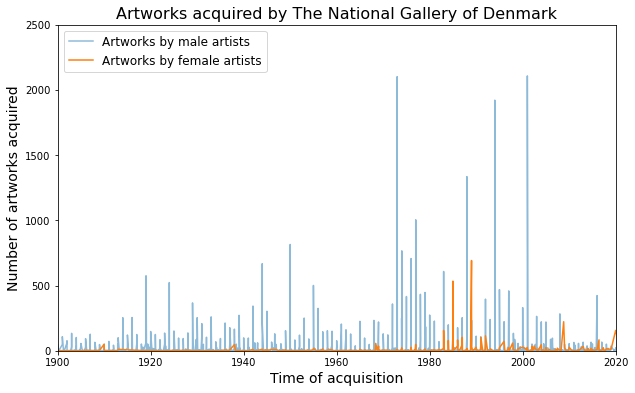

In [38]:
### graph showing art pieces acquired by SMK, sorted by date and gender (non-cumulative)
plt.plot(acquisitions_sorted_male, label='Artworks by male artists', alpha = 0.5)
plt.plot(acquisitions_sorted_female, label='Artworks by female artists')
plt.xlim('1900', '2020')
plt.ylim(0, 2500)
plt.legend(loc=2, fontsize=12)
plt.xlabel('Time of acquisition', fontsize=14)
plt.ylabel('Number of artworks acquired', fontsize=14)
plt.title('Artworks acquired by The National Gallery of Denmark', fontsize=16)

plt.savefig('gender_plot_peryear_zoom', bbox_inches='tight')